<p><b>autor</b>: Jeferson Magalhães</p>
<p><b>email</b>: jefersonmdossantos@gmail.com</p>
<p><b>github</b>: jefersonmglh</p>

# Análise crédito


## Análise descritiva e tratamento de dados

#### Seção 1. Importando pacotes e dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('risco_credito.csv')


In [3]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
show_info(df)

DATASET SHAPE:  (64592, 10) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None

 -----------------------------------------------

### Seção 2. Tratamento de dados 


<AxesSubplot:>

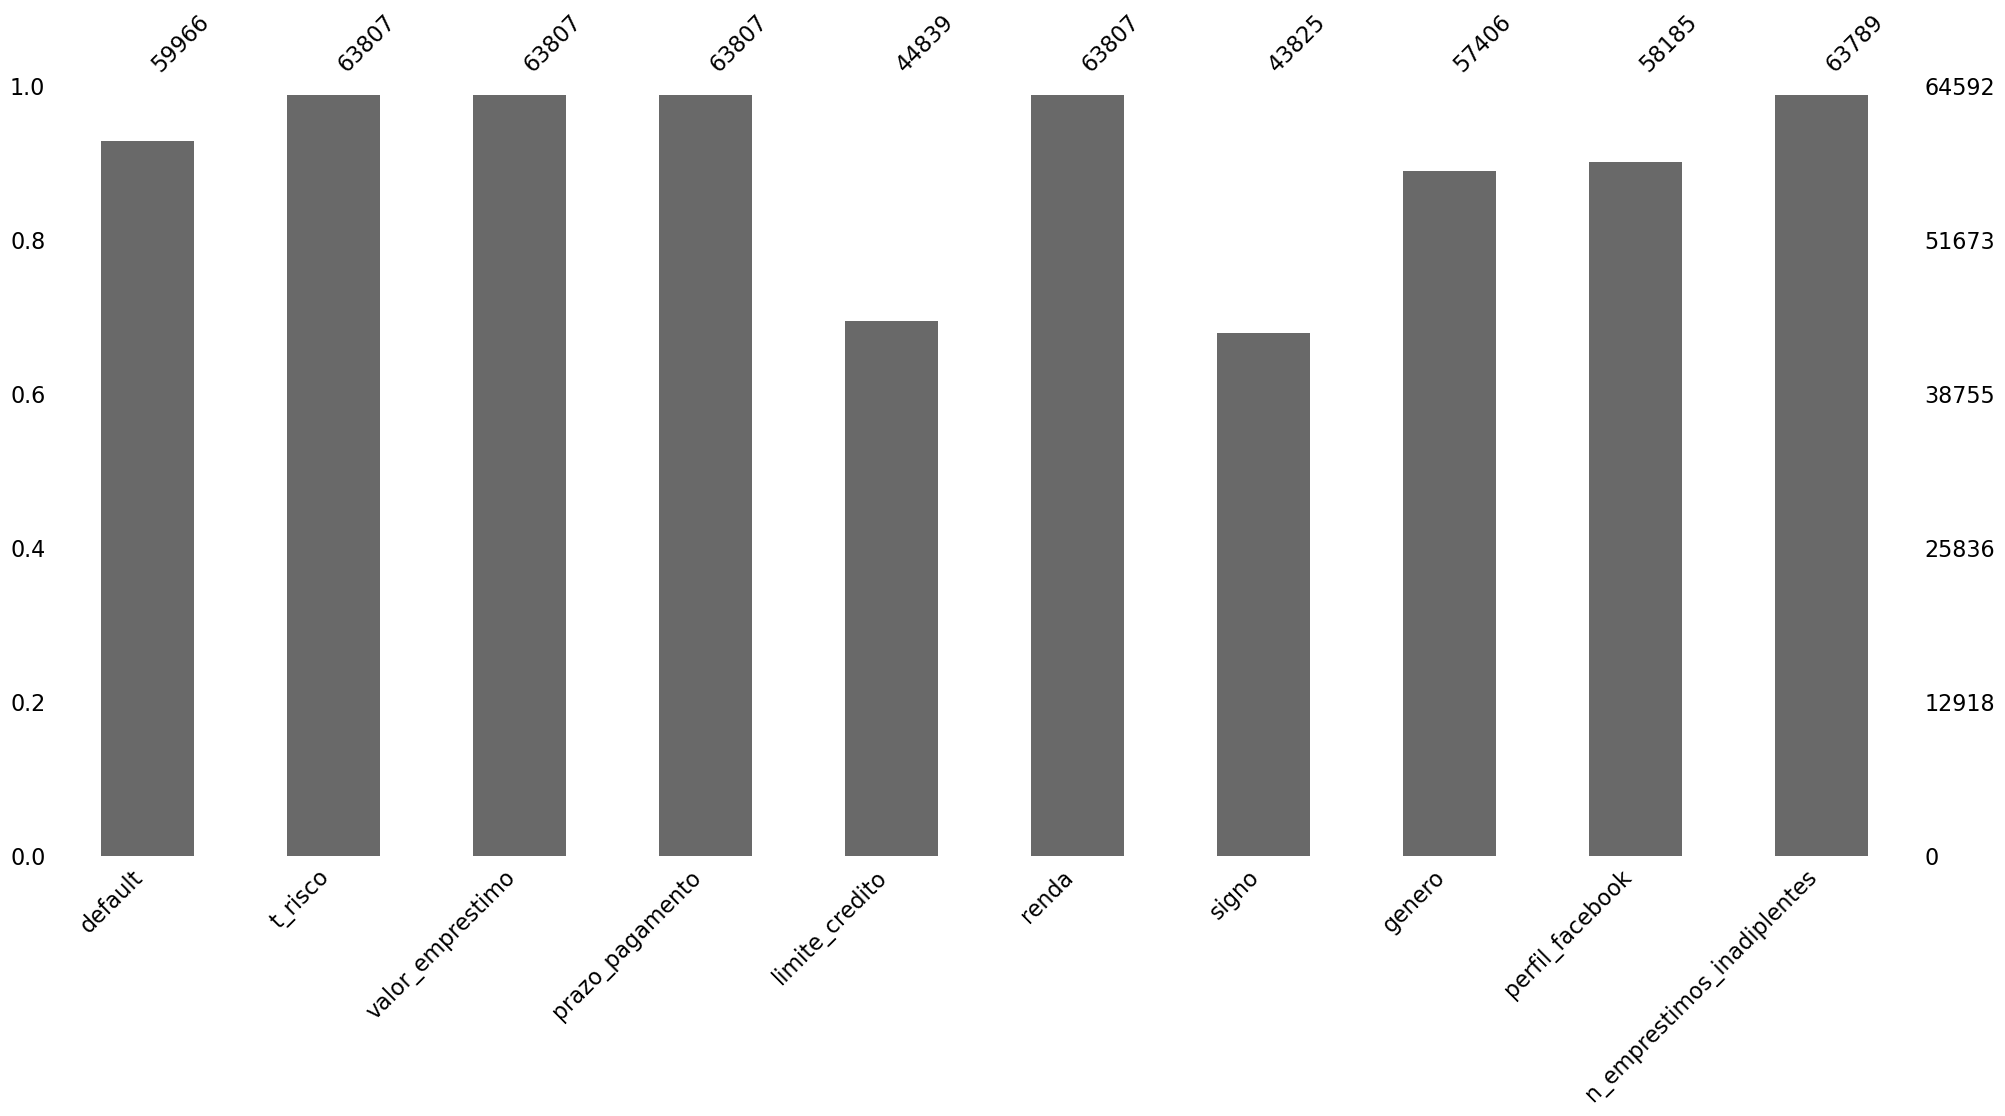

In [5]:
msno.bar(df)

In [6]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,63807.000000,63807.000000,63807.000000,44839.000000,6.380700e+04,63789.000000
mean,0.296404,13853.282850,41.835347,34562.007560,7.180972e+04,0.004703
std,0.101549,8105.662643,10.295568,37041.867093,5.124993e+04,0.079048
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7762.945000,36.000000,10000.000000,4.501336e+04,0.000000
50%,0.290000,12023.680000,36.000000,25775.000000,6.139916e+04,0.000000
75%,0.360000,19384.815000,36.000000,47326.500000,8.602645e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


1. Exclusão das linhas nulas da variável resposta (default)

In [7]:
df = df.dropna(subset=['default'])

2. Analisando as variáveis quantitativas, podemos preencher os valores faltantes de 'limite_credito' e 'n_emprestimos_inadiplentes' pela mediana dos mesmos.

In [8]:
valores_preenchimento = {
    'limite_credito': df['limite_credito'].median(),
    'n_emprestimos_inadiplentes': df['n_emprestimos_inadiplentes'].median()
}
df = df.fillna(value=valores_preenchimento)

3. Substituindo os valores faltantes nas variáveis qualitativas pela moda

In [9]:
df['genero'].value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [10]:
df['perfil_facebook'].value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [11]:
df['signo'].value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

In [12]:
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

In [13]:
df.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                    0
renda                             0
signo                         18938
genero                            0
perfil_facebook                   0
n_emprestimos_inadiplentes        0
dtype: int64

### Seção 3. Análise exploratória e novo tratamento de dados 

4. Analise Univariada

In [14]:
var_t_quali = ['object', 'bool']
quali_columns = list(df.select_dtypes(include=var_t_quali).columns)
quali_columns

['default', 'signo', 'genero', 'perfil_facebook']

In [15]:
df_quali = df[quali_columns]
df_quali.head()

,default,signo,genero,perfil_facebook
0,False,virg,f,True
1,False,sagi,f,False
2,False,libr,m,True
3,False,NaN,m,False
4,False,libr,m,False


default


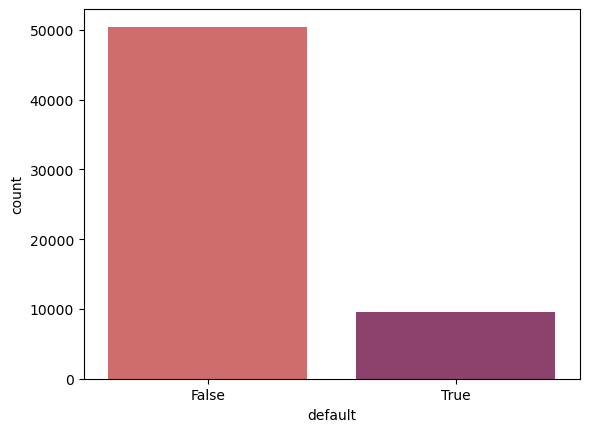

signo


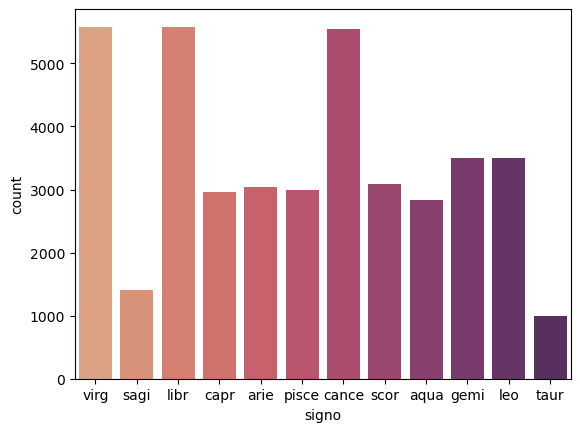

genero


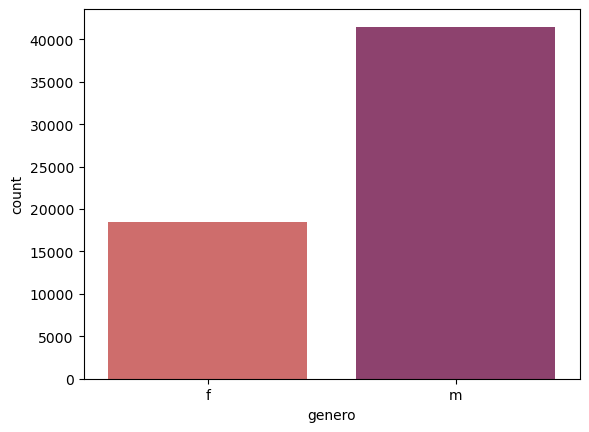

perfil_facebook


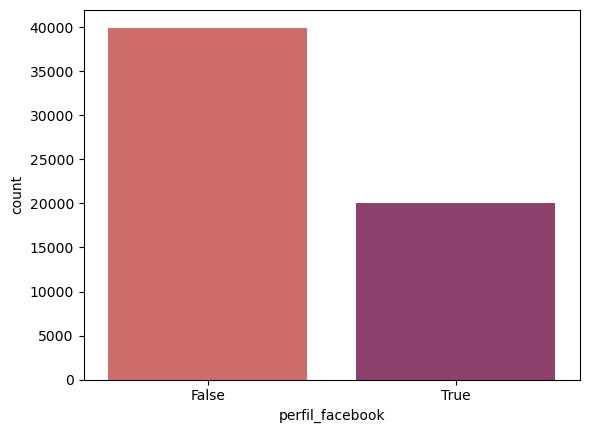

In [16]:
for var_quali in df_quali:
    print(var_quali)
    sns.countplot(df_quali[var_quali], palette='flare')
    plt.show()
    

Observações:

> A variável 'signo' possui classes bastante balanceadas, não traçando nenhuma tendência. 
> Os dados faltantes (nulos) da variável 'signo' correspondem a 31% do total.
> Optei por descartar essa variável


In [17]:
df = df.drop(columns=['signo'])

In [18]:
var_t_quanti = ['float64']
quanti_columns = list(df.select_dtypes(include=var_t_quanti).columns)
quanti_columns


['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [19]:
df_quanti = df[quanti_columns]
df_quanti

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
0,0.43,20024.31,60.0,62386.0,59869.05,0.0
1,0.23,10046.51,36.0,25338.0,46016.31,0.0
2,0.30,21228.25,60.0,25338.0,48025.47,0.0
3,0.15,23032.33,36.0,25338.0,46011.12,0.0
4,0.08,24026.29,36.0,32366.0,90026.17,0.0
...,...,...,...,...,...,...
64587,0.33,7230.74,36.0,25338.0,57012.14,0.0
64588,0.20,9764.01,36.0,15478.0,76032.77,0.0
64589,0.53,35022.28,60.0,18658.0,100028.45,0.0
64590,0.43,20015.96,36.0,25338.0,109561.85,0.0


t_risco


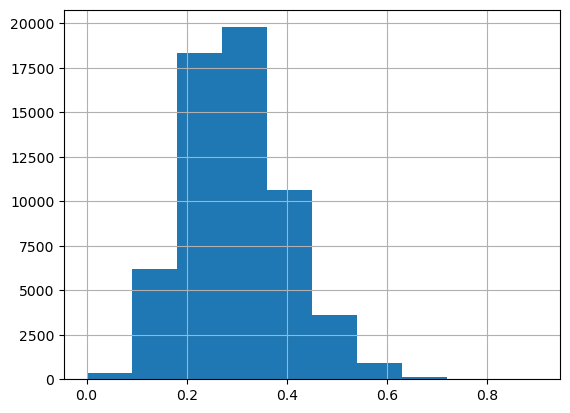

valor_emprestimo


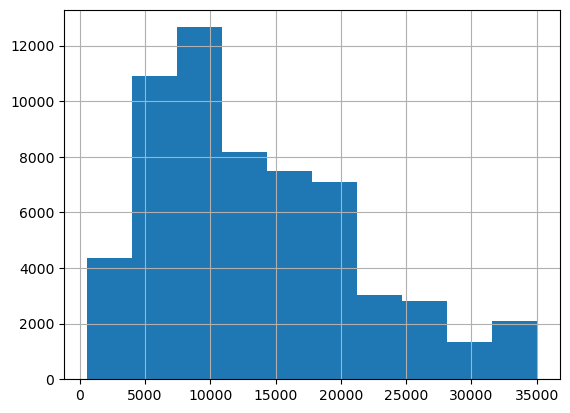

prazo_pagamento


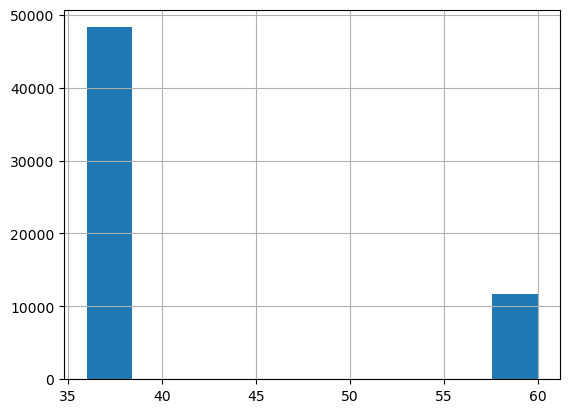

limite_credito


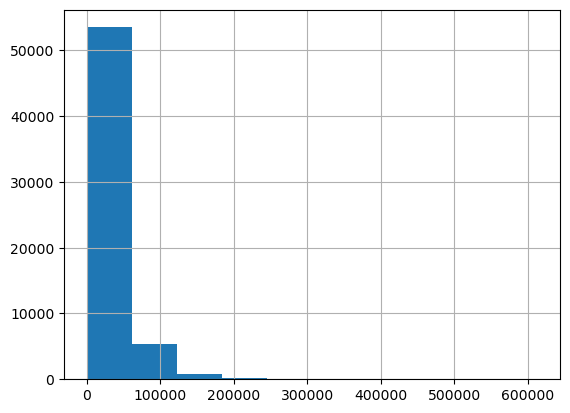

renda


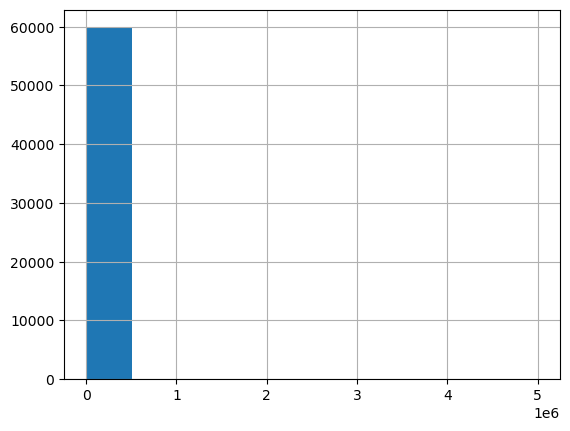

n_emprestimos_inadiplentes


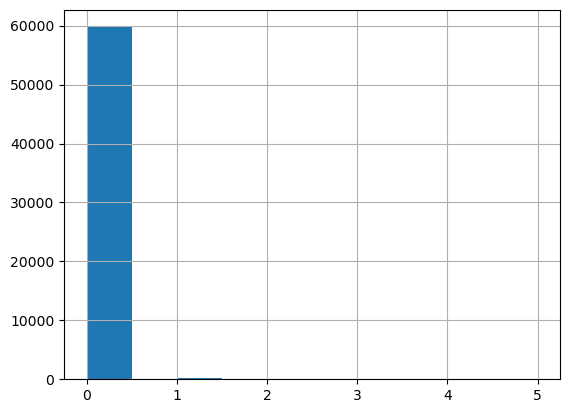

In [20]:
for var_quanti in df_quanti:
    print(var_quanti)
    df_quanti[var_quanti].hist(bins=10)
    plt.show()

In [21]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,59966.000000,5.996600e+04,59966.000000
mean,0.294114,13411.805468,40.674649,31351.281393,7.132578e+04,0.004669
std,0.101183,7957.402823,9.504775,30753.702302,5.169143e+04,0.079048
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,17316.500000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,35125.000000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


Análise descritiva variáveis quantitativa:

* 'Taxa de risco' teve um pico em torno de 0.3
* 75% pediram emprestimo no valor de 18036
* 75% tem limite de crédito de 35125 e o máximo em 613117
* 75% tem renda até 85039
* 75% não foram inadimplentes com emprestétimos

5. Análise Bivariada

<AxesSubplot:xlabel='perfil_facebook', ylabel='count'>

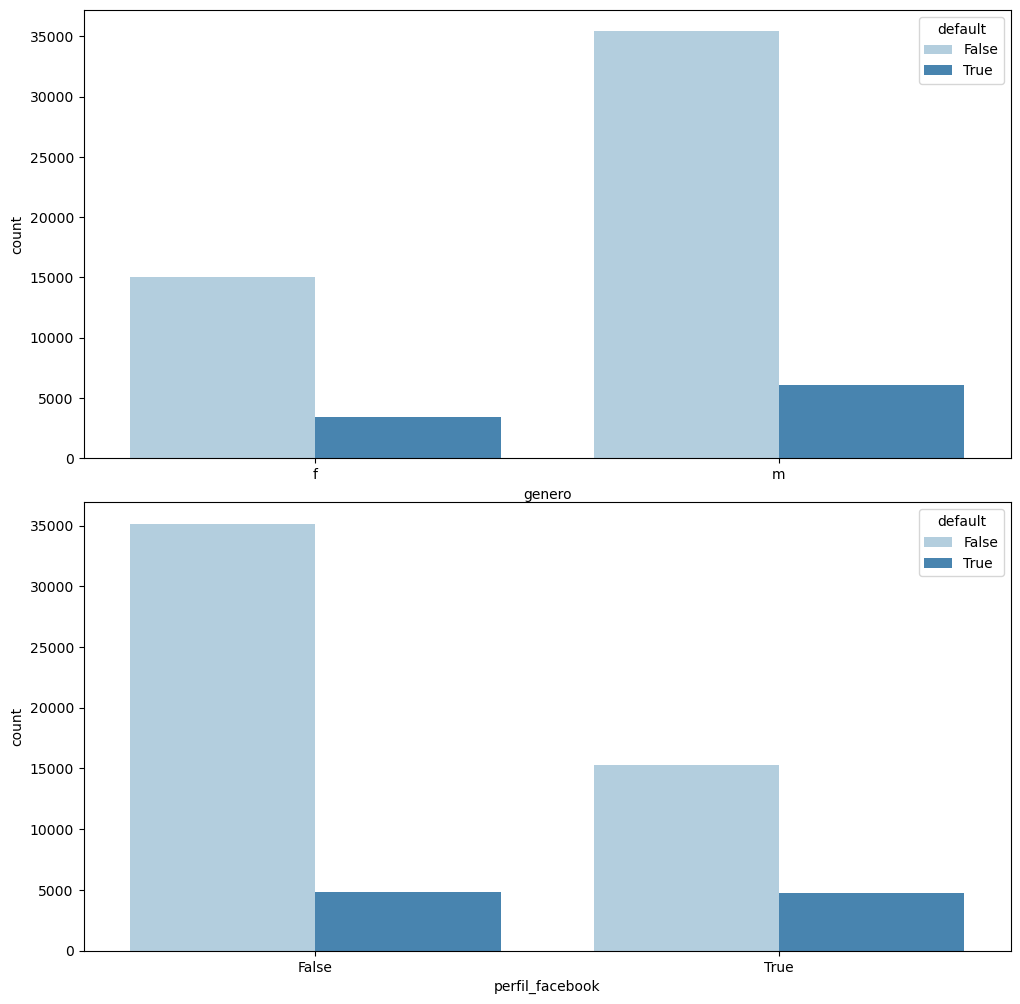

In [22]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
plt.tight_layout()

sns.countplot(df['genero'], hue=df.default, ax=ax[0], palette='Blues')
sns.countplot(df['perfil_facebook'], hue=df.default, ax=ax[1], palette='Blues')

* Parace que entre os dados considerados 'mal pagadores' não diferença entre genêro e ter our não ter perfil em rede social específica.

t_risco


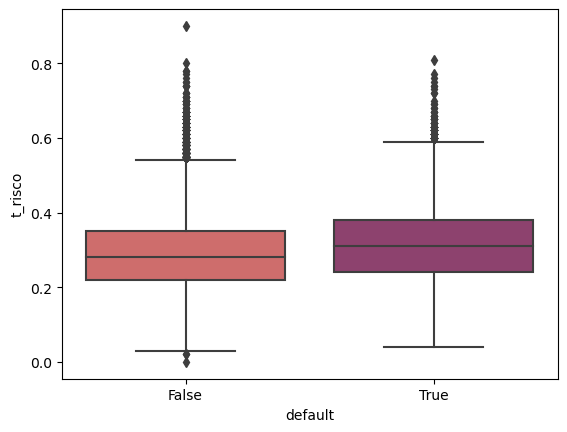

valor_emprestimo


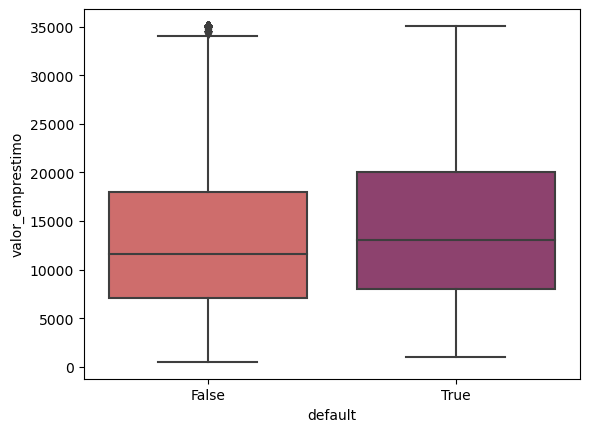

prazo_pagamento


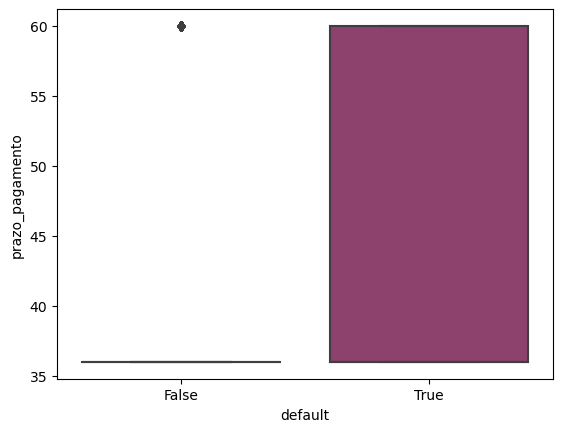

limite_credito


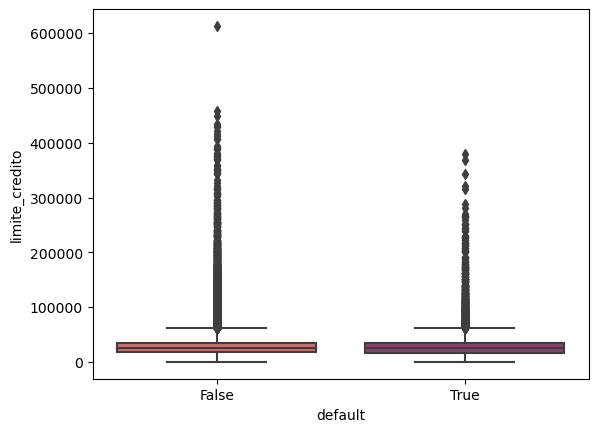

renda


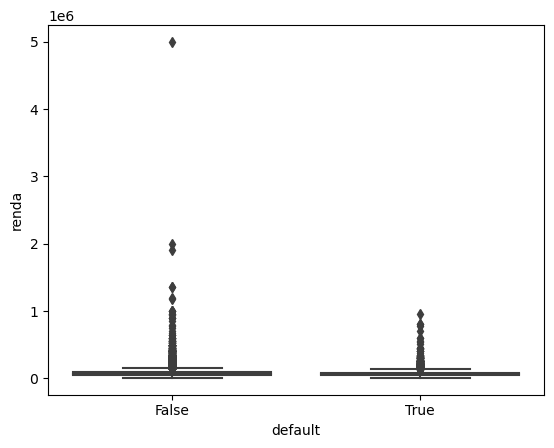

n_emprestimos_inadiplentes


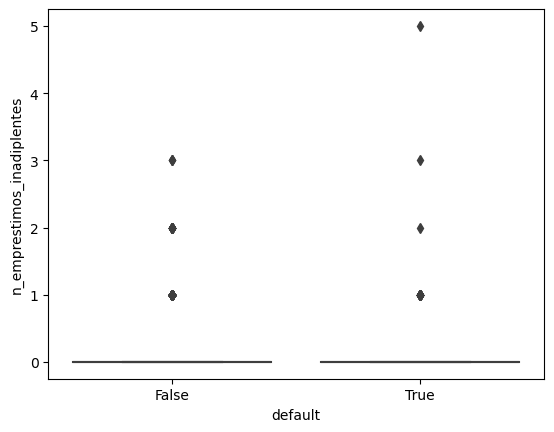

In [23]:
for var_quanti in df_quanti:
    print(var_quanti)
    sns.boxplot(y=df_quanti[var_quanti], x='default', data=df, palette='flare')
    plt.show()

* Aparentemente, dados 'mal pagadores' têm maior taxa de risco de crédito
* dados 'mal pagadores' têm maior valor de empréstimo.
* Variável prazo_pagamento pode se tornar uma variável binária 

<AxesSubplot:title={'center':'Correlação entre as variáveis'}>

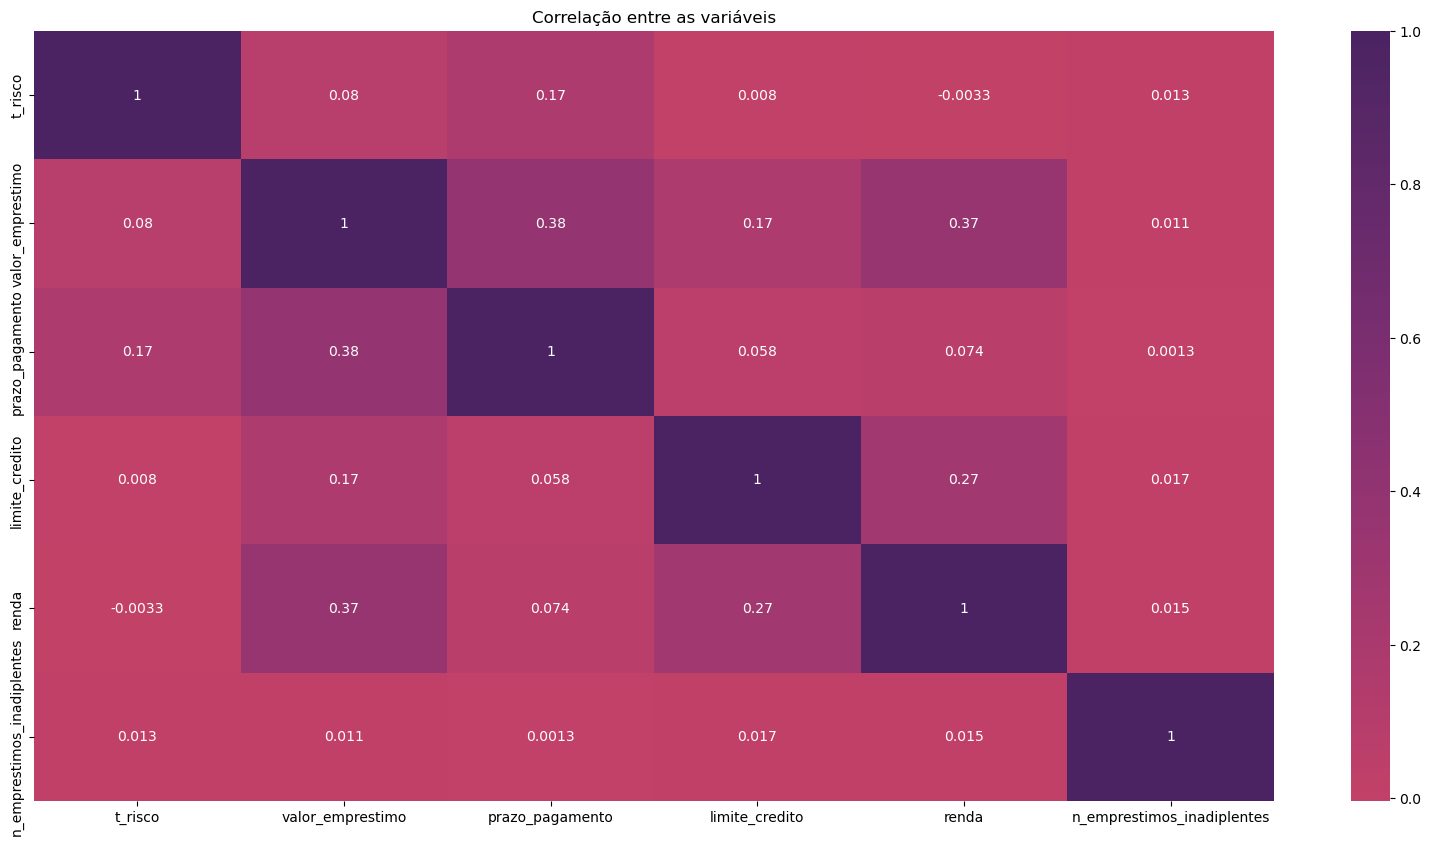

In [24]:
plt.figure(figsize=(20,10))
plt.title('Correlação entre as variáveis')
sns.heatmap(df_quanti.corr(),cmap='flare', center=0, annot=True)

In [25]:
df['default'] = df['default'].astype('str')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              59966 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59966 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 4.2+ MB


6. Novo tratamento de dados (modelagem), transformando variáveis em binárias.

In [27]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,25338.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,25338.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,25338.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,False,0.0


In [28]:
df = pd.get_dummies(df, columns=['default', 'prazo_pagamento','genero','perfil_facebook'], drop_first=True)
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,default_True,prazo_pagamento_60.0,genero_m,perfil_facebook_True
0,0.43,20024.31,62386.0,59869.05,0.0,0,1,0,1
1,0.23,10046.51,25338.0,46016.31,0.0,0,0,0,0
2,0.30,21228.25,25338.0,48025.47,0.0,0,1,1,1
3,0.15,23032.33,25338.0,46011.12,0.0,0,0,1,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,0,1,0


In [29]:
# plt.figure(figsize=(15,7))
# sns.pairplot(df, hue='default_True')
# plt.show()

###    Comparação de diferentes modelos de <em> Machine Learning </em> na previsão da variável resposta
       

In [30]:
from sklearn.model_selection import train_test_split

In [66]:
df_features = df.drop(columns=(['default_True'])).astype('int64')
df_features

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True
0,0,20024,62386,59869,0,1,0,1
1,0,10046,25338,46016,0,0,0,0
2,0,21228,25338,48025,0,1,1,1
3,0,23032,25338,46011,0,0,1,0
4,0,24026,32366,90026,0,0,1,0
...,...,...,...,...,...,...,...,...
64587,0,7230,25338,57012,0,0,1,1
64588,0,9764,15478,76032,0,0,1,0
64589,0,35022,18658,100028,0,1,0,0
64590,0,20015,25338,109561,0,0,1,0


In [67]:
df_label = df['default_True'].astype('int64')
df_label

0        0
1        0
2        0
3        0
4        0
        ..
64587    0
64588    0
64589    0
64590    0
64591    0
Name: default_True, Length: 59966, dtype: int64

### Naives Bayes

In [44]:
df_features_nb = df_features.drop(columns=['perfil_facebook_True', 'genero_m', 'n_emprestimos_inadiplentes'])
df_features_nb.head()

,t_risco,valor_emprestimo,limite_credito,renda,prazo_pagamento_60.0
0,0.43,20024.31,62386.0,59869.05,1
1,0.23,10046.51,25338.0,46016.31,0
2,0.30,21228.25,25338.0,48025.47,1
3,0.15,23032.33,25338.0,46011.12,0
4,0.08,24026.29,32366.0,90026.17,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_features_nb, df_label, test_size=0.2,random_state=32)

#### * Modelagem

In [46]:

from sklearn.naive_bayes import GaussianNB


In [39]:
gnb = GaussianNB()

In [43]:
gnb.fit(X_train, y_train)

GaussianNB()

#### * Predição

In [48]:
y_pred = gnb.predict(X_test)

In [50]:
y_pred == y_test

26621     True
27036     True
20746     True
3817      True
9219      True
         ...  
51879     True
48096     True
51431    False
55080     True
40937    False
Name: default_True, Length: 11994, dtype: bool

#### * Avalição

In [51]:
from sklearn import metrics


In [69]:
Accuracy_nb = metrics.accuracy_score(y_test, y_pred)
Accuracy_nb

0.8450058362514591

In [70]:
print("Número de erros de um total de %d pontos : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Número de erros de um total de 11994 pontos : 1859


In [61]:
mat = metrics.confusion_matrix(y_pred, y_test)
mat

array([[10135,  1859],
       [    0,     0]])

In [64]:
names = np.unique(y_pred)
names

array([0], dtype=uint8)

Text(113.9222222222222, 0.5, 'Predicted')

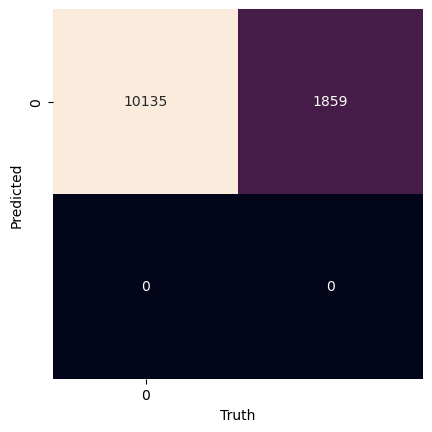

In [75]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')